In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# constants 
path = "E:\\Andreea\\Projects\\Git\\SmartsuitWrapper\\SmartuistWrapper\\tapResultParticipants.csv"
playerNr = 42
idxLength = 28
idxGain = 29

In [29]:
def readFromFile(path):
    results = [0] * 100
    f = open(path, "r")
    player = -1
    for x in f:
        line = x.split(',')
        if len(line) == 31:
            if int(line[0]) == player:
                results[player].append(line)
            else:
                player = int(line[0])
                results[player] = []
                results[player].append(line)
    f.close()
    return results


# a list with the results at idx for the given player    
def getResultPerPlayer(p, results, idx, unique ):
    tmp = results[p]
    values = []
    for words in tmp:
        values.append(float(words[idx]))
    if (unique == True):
        values =  [x for i, x in enumerate(values) if i == values.index(x)]
    return values

# sort list1 - use the indexes of the sorted list1 to rearrage list2    
def getCombinedPlot(list1, list2):
    idx   = np.argsort(list1)
    list1 = np.array(list1)[idx]
    list2 = np.array(list2)[idx]
    
    plt.xticks(np.arange(min(list1), max(list1)+1, 1.0))
    plt.plot(list1[1:], list2[1:], 'o-')
    plt.show()
        
    return (list1, list2)

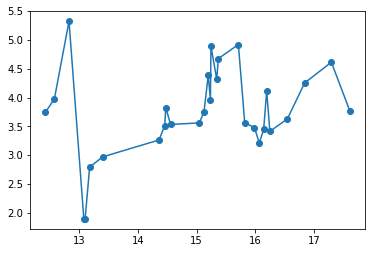

[1.       3.745022 3.980648 5.325381 1.896784 1.896784 2.796377 2.972801
 3.266002 3.514884 3.826685 3.53531  3.562553 3.756238 4.385892 3.964779
 4.89598  4.322258 4.67754  4.921801 3.566763 3.480027 3.21262  3.447916
 4.113308 3.415734 3.629692 4.255866 4.614718 3.771743]
[-1.      12.42537 12.57869 12.82749 13.08006 13.10166 13.17925 13.40069
 14.36166 14.45809 14.47604 14.55854 15.04931 15.12739 15.19972 15.23721
 15.24593 15.34377 15.3724  15.71322 15.82109 15.9877  16.0696  16.14372
 16.19565 16.24966 16.54704 16.84246 17.29799 17.61143]
Optimal lenght:  4.2141090000000005


In [30]:
results = readFromFile(path)

lengths = getResultPerPlayer(playerNr, results, idxLength, True)
gain = getResultPerPlayer(playerNr, results, idxGain, True)

for i in range(len(lengths)-1, 1, -1):   
        lengths[i] = lengths[i-1]


gain, lengths = getCombinedPlot(gain, lengths)

# get avg length for the top 3 values of gain
print(lengths)
print(gain)
avg = sum(lengths[-3:]) / 3
print("Optimal lenght: ", avg)